In [1]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler


df = pd.read_csv('diabetes.csv')


df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0


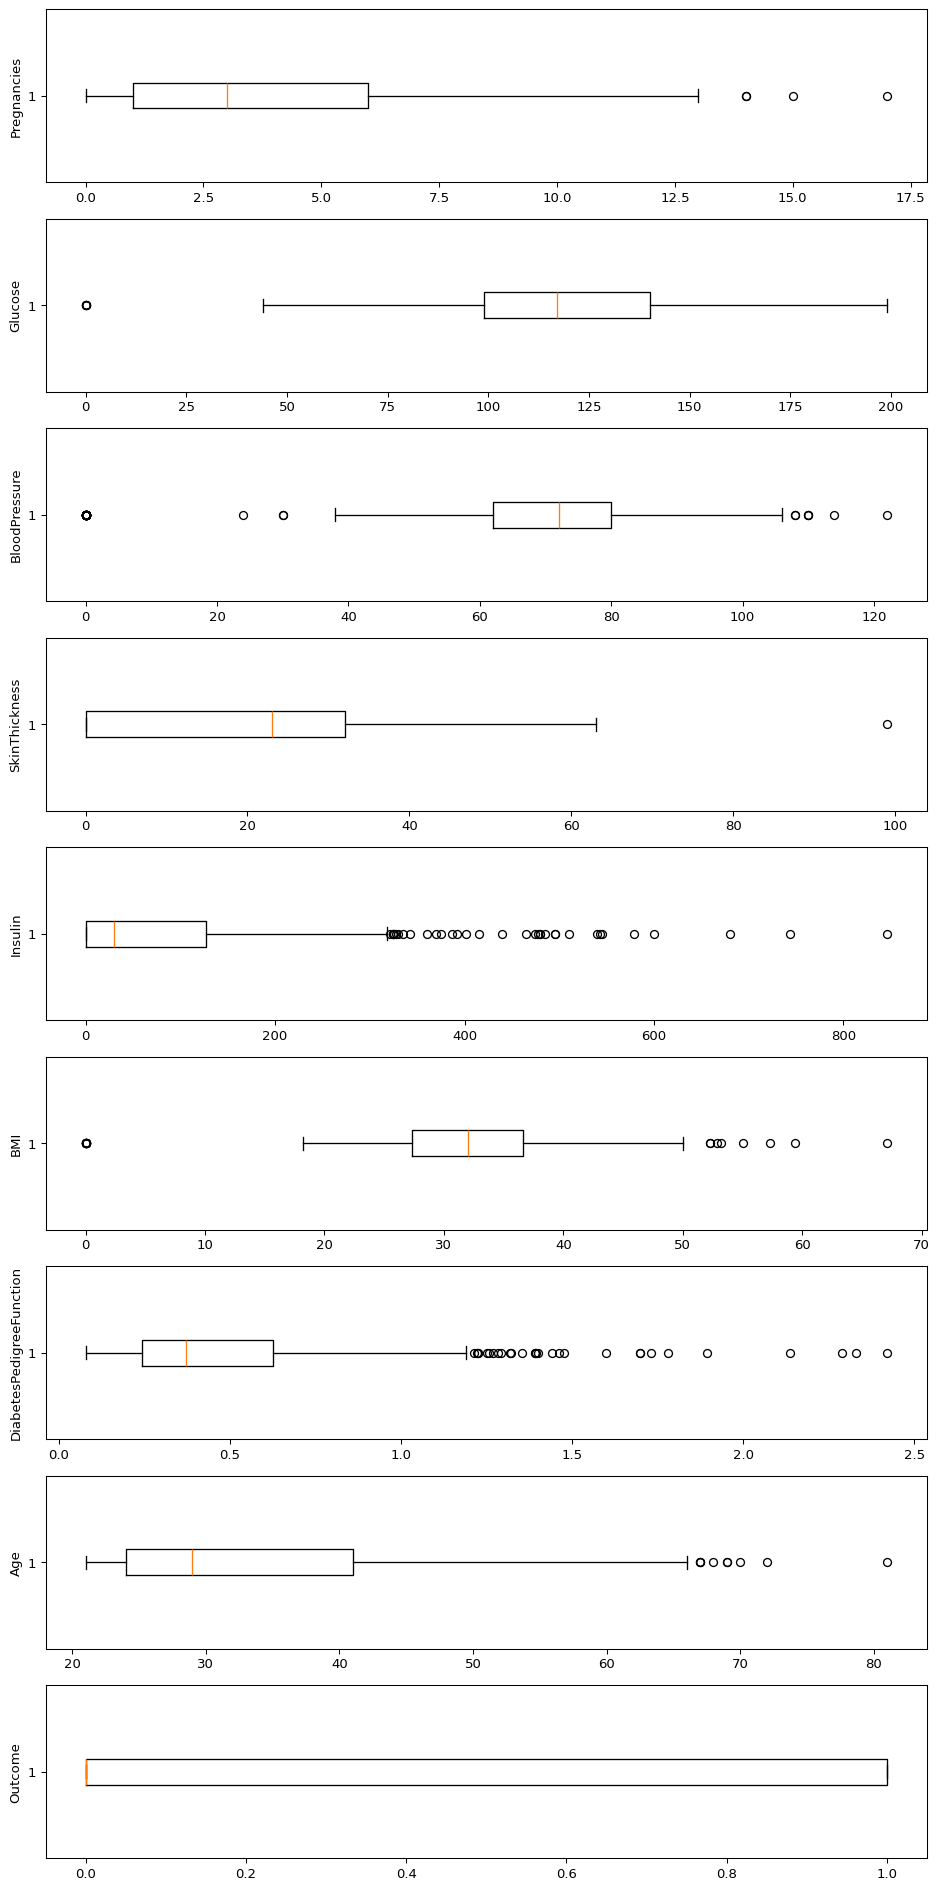

In [6]:
df.describe()
fig,axs=plt.subplots(len(df.columns),1,figsize=(10,20),dpi=95)
for i , col in enumerate(df.columns):
    axs[i].boxplot(df[col],vert=False)
    axs[i].set_ylabel(col)
plt.tight_layout()
plt.show()
    

Remove Outlayer 

In [7]:
q1,q3=np.percentile(df['Insulin'],[25,75])
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
clean_df=df[(df['Insulin']> lower) & (df['Insulin']<upper)]

Corelation analysis 

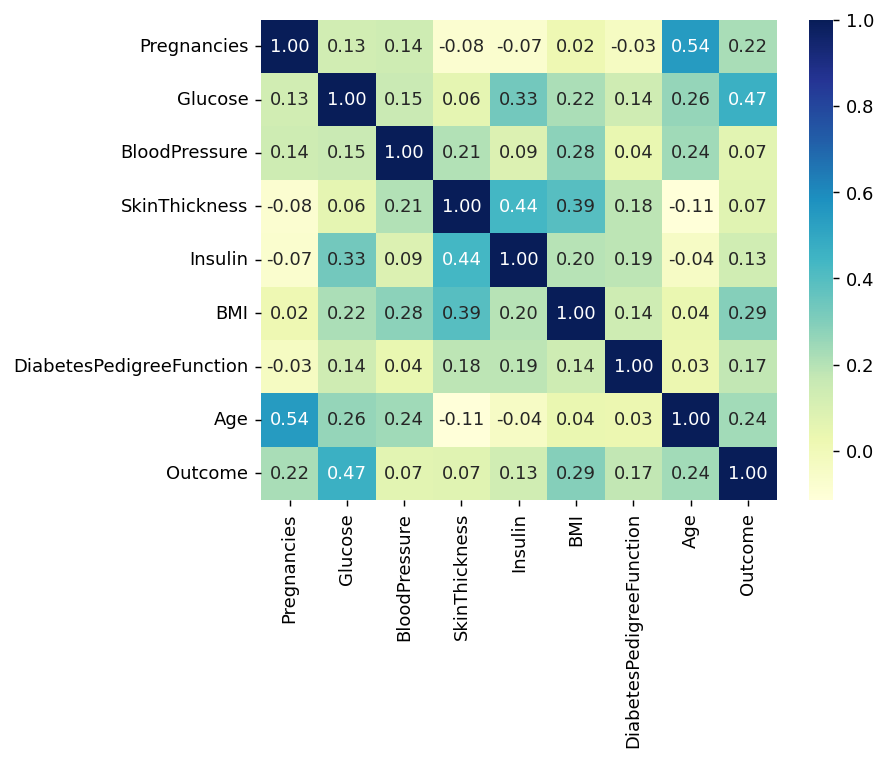

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [8]:
corr=df.corr()
plt.figure(dpi=130)
sns.heatmap(corr,annot=True,fmt='.2f',cmap='YlGnBu')
plt.show()
print(corr['Outcome'].sort_values(ascending=False))